# Mempool analysis 557912-557994

In [1]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [2]:
lines = [line.rstrip('\n') for line in open('data/mempool/mempoolcache557994.csv')]
poolRates = [line.split(',') for line in lines[1:]]

byHeight = {}
for poolRate in poolRates:
    rates = list(map(float, poolRate[1:]))
    byHeight[poolRate[0]]= rates

In [3]:
stats = {'height': [],
         'numberOfRates': [],
         'averageRate': [],
         'std': [],
         'medianRate': [],}

for height, rates in byHeight.items():
    stats['height'].append(height)
    stats['numberOfRates'].append(len(rates))
    stats['averageRate'].append(np.mean(rates))
    stats['std'].append(np.std(rates))
    stats['medianRate'].append(np.median(rates))

df = pd.DataFrame.from_dict(stats)
df = df.sort_values(by=['height'])
df

,height,numberOfRates,averageRate,std,medianRate
61,557912,3051,15.981302,34.865325,4.0780
74,557913,392,11.382186,22.167106,3.0160
69,557915,3606,16.775826,50.591120,3.6130
31,557916,3875,14.119077,31.402952,3.6250
75,557917,3560,11.106091,30.711832,2.5470
62,557918,6875,15.192340,34.166570,4.5740
24,557919,4729,5.078710,14.029352,2.6180
25,557920,3903,6.948831,52.355144,2.5310
51,557921,3933,12.862605,31.083826,2.6180
19,557924,13254,26.598753,41.455709,17.4520


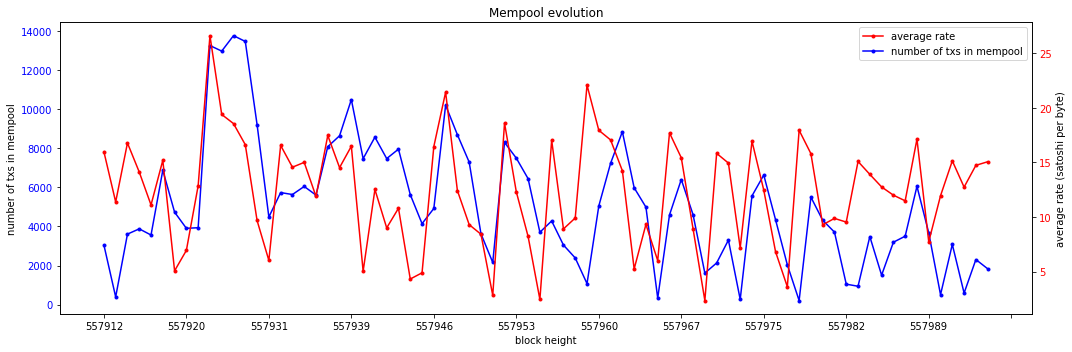

In [16]:
import matplotlib.pyplot as plt

#TODO: https://stackoverflow.com/questions/6682784/how-to-reduce-number-of-ticks-with-matplotlib
x1 = df["height"].values
y1 = df["numberOfRates"].values
y2 = df["averageRate"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.plot(x1,y1, c='b', marker='.', label='number of txs')
ax.set_xlabel('block height')
ax.set_ylabel('number of txs in mempool')
ax.tick_params(axis='y', labelcolor="b")

ax2 = ax.twinx()
ax2.set_ylabel('average rate (satoshi per byte)')  # we already handled the x-label with ax1
ax2.plot(x1, y2, c='r', marker='.', label='average rate')
ax2.plot([], [], c='b', marker='.', label='number of txs in mempool')
ax2.tick_params(axis='y', labelcolor="r")

ax.xaxis.set_major_locator(plt.MultipleLocator(7))
    
plt.title('Mempool evolution')
plt.legend(loc=1)
fig.tight_layout()
